**Visualize**

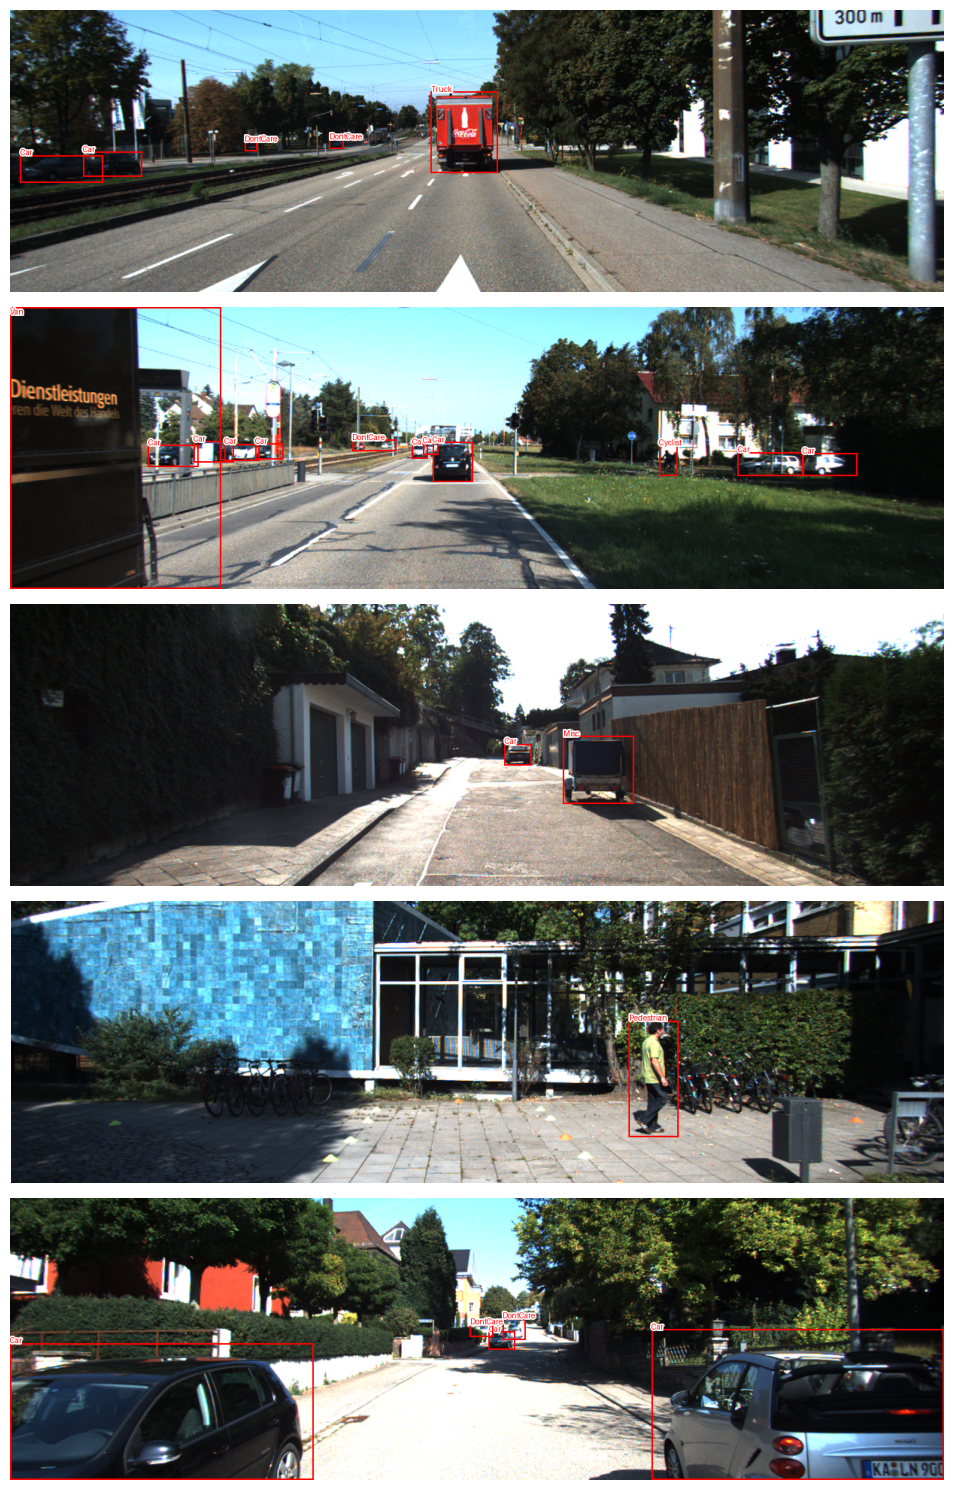

In [3]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_kitti_images_with_labels(image_folder, label_folder, num_images):
    # List all image files in the given folder
    all_image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    # Randomly select the specified number of image files
    selected_image_files = random.sample(all_image_files, min(num_images, len(all_image_files)))
    
    # Generate the full paths for the selected images and their corresponding label files
    image_paths = [os.path.join(image_folder, f) for f in selected_image_files]
    label_paths = [os.path.join(label_folder, f.replace('.png', '.txt')) for f in selected_image_files]
    
    # Determine the number of images to plot
    num_images_to_plot = len(image_paths)
    
    # Setup the subplot grid for vertical layout
    fig, axes = plt.subplots(num_images_to_plot, 1, figsize=(20, 15))
    
    for i in range(num_images_to_plot):
        # Load the image
        image = Image.open(image_paths[i])
        draw = ImageDraw.Draw(image)
        
        # Read and parse the label file
        with open(label_paths[i], 'r') as file:
            labels = file.readlines()
        
        for label in labels:
            parts = label.split()
            object_class = parts[0]
            bbox = [float(part) for part in parts[4:8]]  # KITTI bounding box coordinates
            
            draw.rectangle(bbox, outline='red', width=2)
            label_position = (bbox[0], max(bbox[1] - 10, 0))
    # Draw the label name with the bounding box
            draw.text(label_position, f"{object_class}", fill='Red',stroke_fill='white',stroke_width=2)
            # draw.text((bbox[0], bbox[1]), object_class, fill='red')
        
        # Adjust for single or multiple images
        if num_images_to_plot > 1:
            axes[i].imshow(image)
            axes[i].axis('off')
        else:
            plt.imshow(image)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage
image_folder = 'C:\Codes\Summer_Internship\Data\data_object_image_22'
label_folder = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/training/label_2'
draw_kitti_images_with_labels(image_folder, label_folder, 5)

In [3]:
import os
import random
from PIL import Image, ImageDraw


**Randomly copy and make Val folder**

In [5]:
import shutil
import random

def create_val_set(image_folder, label_folder, calib_folder, val_dir, num_files):
    # Ensure the validation directory and its subdirectories exist
    for subdir in ['image_2', 'label_2', 'calib']:
        os.makedirs(os.path.join(val_dir, subdir), exist_ok=True)
    
    # Randomly select the specified number of image files
    all_image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    selected_image_files = random.sample(all_image_files, min(num_files, len(all_image_files)))
    
    # Copy the selected image files and their corresponding label and calibration files
    for file_name in selected_image_files:
        # Define source paths
        src_image_path = os.path.join(image_folder, file_name)
        src_label_path = os.path.join(label_folder, file_name.replace('.png', '.txt'))
        src_calib_path = os.path.join(calib_folder, file_name.replace('.png', '.txt'))
        
        # Define destination paths
        dest_image_path = os.path.join(val_dir, 'image_2', file_name)
        dest_label_path = os.path.join(val_dir, 'label_2', file_name.replace('.png', '.txt'))
        dest_calib_path = os.path.join(val_dir, 'calib', file_name.replace('.png', '.txt'))
        
        # Copy files
        shutil.copy(src_image_path, dest_image_path)
        shutil.copy(src_label_path, dest_label_path)
        shutil.copy(src_calib_path, dest_calib_path)

# Define the source directories (from the provided code)
image_folder = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/training/image_2'
label_folder = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/training/label_2'
calib_folder = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/training/calib'  # Assuming a similar path for calibration files

# Define the destination directory for the validation set
val_dir = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/validation'

# Number of files to copy
num_files = 480  # Adjust as needed

# Create the validation set
create_val_set(image_folder, label_folder, calib_folder, val_dir, num_files)

**Make label**

In [ ]:
import os

# Define the class names and their corresponding numerical IDs
class_names_to_id = {
    "Car": 0,
    "Van": 1,
    "Truck": 2,
    "Pedestrian": 3, 
    "Person_sitting": 4,
    "Cyclist": 5,
    "Tram": 6,
    "Misc": 7,
    "DontCare": 8
}

# Directories
source_dir = 'label_2'
target_dir = 'label'

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# Process each file in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.txt'):
        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        
        with open(source_path, 'r') as source_file, open(target_path, 'w') as target_file:
            for line in source_file:
                parts = line.strip().split(' ')
                class_name = parts[0]
                
                # Check if the class name is 'Pedestrian'
                if class_name in class_names_to_id:
                    # Replace class name with its numerical ID
                    parts[0] = str(class_names_to_id[class_name])
                    # Write the modified line to the target file
                    target_file.write(' '.join(parts) + '\n')

In [5]:
import os

# Define the class names and their corresponding numerical IDs
class_names_to_id = {
    "Car": 0,
    "Van": 1,
    "Truck": 2,
    "Pedestrian": 3, 
    "Person_sitting": 4,
    "Cyclist": 5,
    "Tram": 6,
    "Misc": 7,
    "DontCare": 8
}

# Directories
source_dir = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/validation/label_2'
target_dir = '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/validation/label'

# Image dimensions (for normalization)
# Replace these with the actual dimensions of your images
img_width = 1224
img_height = 370

# Ensure target directory exists
os.makedirs(target_dir, exist_ok=True)

# Process each file in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.txt'):
        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        
        with open(source_path, 'r') as source_file, open(target_path, 'w') as target_file:
            for line in source_file:
                parts = line.strip().split(' ')
                class_name = parts[0]
                
                if class_name in class_names_to_id:
                    # Convert bounding box to YOLO format
                    left, top, right, bottom = map(float, parts[4:8])
                    x_center = (left + right) / 2
                    y_center = (top + bottom) / 2
                    width = right - left
                    height = bottom - top
                    
                    # Normalize coordinates
                    x_center_norm = x_center / img_width
                    y_center_norm = y_center / img_height
                    width_norm = width / img_width
                    height_norm = height / img_height
                    
                    # Write the YOLO formatted bounding box to the target file
                    target_file.write(f"{class_names_to_id[class_name]} {x_center_norm} {y_center_norm} {width_norm} {height_norm}\n")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/validation/label_2'

In [6]:
!nvidia-smi

/home/neutrino/miniconda3/envs/Ml/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Mon Jul  1 01:02:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8               3W /  60W |   3030MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Implement**

In [5]:
from ultralytics import YOLO

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9c.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(
    data="C:\Codes\Summer_Internship\kitti.yaml", epochs=10, imgsz=640, batch=3)

# Run inference with the YOLOv9c model on the 'bus.jpg' image

<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
C:\Users\arpit\AppData\Local\Temp\ipykernel_4640\322688929.py:11: SyntaxWarning: invalid escape sequence '\C'
  data="C:\Codes\Summer_Internship\kitti.yaml", epochs=10, imgsz=640, batch=3)
100%|██████████| 49.4M/49.4M [00:06<00:00, 7.51MB/s]


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs
Ultralytics YOLOv8.2.42  Python-3.12.4 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=C:\Codes\Summer_Internship\kitti.yaml, epochs=10, time=None, patience=100, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

c:\Codes\ads\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AMP: checks passed 


train: Scanning C:\Codes\Summer_Internship\train.cache... 7400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7400/7400 [00:00<?, ?it/s]
val: Scanning C:\Codes\Summer_Internship\valid.cache... 1417 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1417/1417 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0004921875), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.09G      1.237      1.105      1.117         16        640: 100%|██████████| 2467/2467 [18:54<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:37<00:00,  6.32it/s]

                   all       1417       7617       0.55      0.433       0.47      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.79G      1.216     0.9265       1.12          5        640: 100%|██████████| 2467/2467 [17:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:39<00:00,  6.06it/s]

                   all       1417       7617      0.679      0.456      0.522      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.77G      1.179     0.8661      1.106         10        640: 100%|██████████| 2467/2467 [16:18<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:34<00:00,  6.81it/s]

                   all       1417       7617      0.544      0.519      0.577      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.77G      1.114     0.7798      1.072          7        640: 100%|██████████| 2467/2467 [16:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:33<00:00,  6.99it/s]

                   all       1417       7617      0.734      0.578      0.661      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.76G      1.061     0.7201      1.045          3        640: 100%|██████████| 2467/2467 [16:33<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:34<00:00,  6.96it/s]

                   all       1417       7617      0.723      0.629      0.703       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.76G      1.012     0.6613      1.025         20        640: 100%|██████████| 2467/2467 [16:32<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:33<00:00,  6.99it/s]

                   all       1417       7617      0.739       0.62      0.699      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.8G     0.9663     0.6134      1.006          6        640: 100%|██████████| 2467/2467 [16:40<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:34<00:00,  6.93it/s]

                   all       1417       7617      0.759       0.69      0.758        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.76G      0.931     0.5695     0.9905         21        640: 100%|██████████| 2467/2467 [16:39<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:34<00:00,  6.90it/s]

                   all       1417       7617      0.848       0.71      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.76G     0.8871     0.5319     0.9703         15        640: 100%|██████████| 2467/2467 [16:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:36<00:00,  6.57it/s]

                   all       1417       7617      0.843      0.733      0.826      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.75G     0.8442     0.4943     0.9522         13        640: 100%|██████████| 2467/2467 [17:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:35<00:00,  6.69it/s]

                   all       1417       7617      0.834      0.749      0.827      0.594



10 epochs completed in 2.952 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 51.6MB
Optimizer stripped from runs\detect\train\weights\best.pt, 51.6MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.42  Python-3.12.4 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv9c summary (fused): 384 layers, 25325416 parameters, 0 gradients, 102.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [00:32<00:00,  7.37it/s]


                   all       1417       7617      0.834       0.75      0.827      0.594
                   Car       1273       5423      0.948      0.835      0.942      0.748
            Pedestrian        315        830      0.869      0.649      0.778      0.449
                   Van        387        540      0.874      0.802      0.874      0.674
               Cyclist        226        320      0.877      0.731       0.82      0.545
                 Truck        179        186      0.937      0.855      0.936       0.76
                  Misc        143        167       0.66      0.725      0.731      0.509
                  Tram         76        112      0.846      0.804      0.886      0.659
        Person_sitting         14         39       0.66      0.597      0.647      0.409
Speed: 0.3ms preprocess, 10.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs\detect\train



C:\Users\arpit\AppData\Local\Temp\ipykernel_4640\322688929.py:11: SyntaxWarning: invalid escape sequence '\C'
  data="C:\Codes\Summer_Internship\kitti.yaml", epochs=10, imgsz=640, batch=3)


FileNotFoundError: /mnt/Main Drive/Codes/Internship_collage/dataset/data_object_image_2/testing/image_2/000001.png does not exist

In [6]:
valid_results = model.val()

Ultralytics YOLOv8.2.42  Python-3.12.4 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


val: Scanning C:\Codes\Summer_Internship\valid.cache... 1417 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1417/1417 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 473/473 [00:50<00:00,  9.45it/s]


                   all       1417       7617      0.833      0.748      0.826      0.594
                   Car       1273       5423      0.947      0.836      0.942      0.749
            Pedestrian        315        830      0.866      0.649      0.779      0.449
                   Van        387        540      0.877      0.802      0.875      0.675
               Cyclist        226        320      0.876      0.731      0.821      0.546
                 Truck        179        186      0.935       0.86      0.936      0.766
                  Misc        143        167      0.663      0.725      0.731      0.507
                  Tram         76        112      0.845      0.804      0.886      0.658
        Person_sitting         14         39      0.652      0.576      0.639      0.406
Speed: 0.3ms preprocess, 26.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train2
